## Comparison of *ab initio* and single active electron simulations of Ar

We use a single active electron potential of the following form
 $$
V(r) = -r^{-1}\left\{
1+Ae^{-r}+(Z-1-A)e^{-Br}
\right\},
$$
taken from K. Schiessl, E. Persson, A. Scrinzi, and J. Burgdorfer, Phys. Rev. A 74, 053412 (2006), 
where $A = 5.4$ and $B = 3.852$. The correspondinng force is calculated from 
$$
-\frac{dV(r)}{dr} = -r^{-2}
\left\{
1+A(1+r)e^{-r}+(Z-1-A)(1+Br)e^{-Br}
\right\}.
$$
We first obtained the ground state by performing imaginary-time relaxation. It turned out that the present potential correctly supports $1s,2s,2p,3s,3p$ bound states. We chose only the $3p_0$ orbital to be active, and all the inner shells to be frozen-core. Then we propagate $\chi$ according to
$$
i\frac{d}{dt}|\chi\rangle = \left(1-\sum_{i}|\phi_i\rangle\langle\phi_i|-|\chi\rangle\langle\chi|\right) \left(T+V+V_{\rm laser}\right) |\chi\rangle, \hspace{1em} |\chi(t=0)\rangle = |\phi_{3p_0}\rangle
$$
where the summation $i$ runs over $1s,2s,2p,3s,3p_{\pm 1}$.

## Expectation value of one-body operator: We use (i).
Several possibilities. (i) If we assume a simple SAE-motivated total wavefunction expression, 
$$
\Psi = \Phi_{\rm core}\phi(1)\chi(2), 
$$
where $\Phi_{\rm core}$ is the core (and neglected hereafter), $\phi$ is the initial HOMO orbital and $\chi$ is the evolving orbital, we have
$$
\langle\Psi|\hat{h}|\Psi\rangle = \langle\chi|h|\chi\rangle,
$$
where we assumed $\phi$ and $\chi$ are both normalized, and $\langle\phi|h|\phi\rangle = 0$.
(ii) Assuminng restricted Hartree-Fock (RHF) type wavefunctionn, $\Psi = \chi\chi$, derives the RHF expression of observables 
$$
\langle\Psi|\hat{h}|\Psi\rangle = 2\langle\chi|h|\chi\rangle.
$$
(iii) Finally if we have a spin-symmetry adapted CIS-type wavefunnctionn, 
$$
\Psi = \frac{1}{2(1+|S|^2)}\left\{\phi(1)\chi(2)+\chi(1)\phi(2)\right\}, 
$$
where $S=\langle\phi|\chi\rangle$, we have
$$
\langle\Psi|\hat{h}|\Psi\rangle = \frac{1}{2(1+|S|^2)}\langle\phi\chi+\chi\phi|(h_1+h_2)|\phi\chi+\chi\phi\rangle
= \frac{\langle\chi|h|\chi\rangle+2 {\rm Re}[\langle\chi|h|\phi\rangle S]}{1+|S|^2}.
%= \frac{1}{1+|S|^2}\langle\phi\chi+\chi\phi|h_1|\phi\chi+\chi\phi\rangle 
%\\ =\frac{
%\langle\phi|h|\phi\rangle\langle\chi|\chi\rangle +
%\langle\phi|h|\chi\rangle\langle\chi|\phi\rangle + 
%\langle\chi|h|\phi\rangle\langle\phi|\chi\rangle +
%\langle\chi|h|\chi\rangle\langle\phi|\phi\rangle
%}{1+|S|^2}
$$
Note that in the present implementation of td1c (as of May 29, 2020), results in the op0 and op1 files correspond, respectively, to definitions  (i) and (iii). 

## Ionization probabilities: We use (i).
We want the probabilities of no ionization $P_0$ and single ionization $P_1$, 
$$
P_0 =  \int_<dx_1 \int_<dx_2 \Psi^*(1,2)\Psi(1,2), \hspace{1em}
P_1 = 2 \int_>dx_1 \int_<dx_2 \Psi^*(1,2)\Psi(1,2).
%\frac{1}{2(1+|S|^2)} \int_<dx_1 \int_<dx_2 \left\{\phi^*(1)\chi^*(2)+\chi^*(1)\phi^*(2)\right\}\left\{(\phi(1)\chi(2)+\chi(1)\phi(2)\right\}
%= \frac{\langle\chi|\chi\rangle_<+|S|^2}{1+|S|^2}
$$
(i) For the SAE wavefunction, 
$$
P_0 = \langle\chi|\chi\rangle_<, \hspace{1em} P_1 = \langle\chi|\chi\rangle_> = 1-\langle\chi|\chi\rangle_<.
$$
(ii) For the RHF wavefunction, 
$$
P_0 = \langle\chi|\chi\rangle_<\langle\chi|\chi\rangle_<, \hspace{1em} 
P_1 = 2\langle\chi|\chi\rangle_<\langle\chi|\chi\rangle_> = 2\langle\chi|\chi\rangle_<(1-\langle\chi|\chi\rangle_<).
$$
(iii) For the CIS wavefunction, 
$$
P_0 = \frac{|S|^2+\langle\chi|\chi\rangle_<}{1+|S|^2}, \hspace{1em}
P_1 = \frac{1-\langle\chi|\chi\rangle_<}{1+|S|^2}.
$$
Note that in the present implementation of td1c (as of May 29, 2020), results in the ipx file includes $P_0$(i), $P_1$(iii), and $P_{k>1}$(ii). 


In [58]:
import math
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.family'] ='sans-serif'
#plt.rcParams['font.family'] = 'Arial'
plt.rcParams['xtick.direction'] = 'in' # or 'out', or 'inout'
plt.rcParams['ytick.direction'] = 'in'# or 'out', or 'inout'
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.top'] = True
plt.rcParams['xtick.major.bottom'] = True
plt.rcParams['ytick.major.left'] = True
plt.rcParams['ytick.major.right'] = True

In [62]:
_,tdip_sae,_,_,_,_,_,_ = np.loadtxt('01E14w1200cyc3_mask_SAE/Ar.P1.op1', unpack=True) # SAE dipole, velocity, and acceleration
_,tion_sae,_,_,_,_,_,_,_ = np.loadtxt('01E14w1200cyc3_mask_SAE/Ar.P1.ipx', unpack=True) # SAE ionization probability
_,time_abi,_,_,_,_,_,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_TDHF/Ar.RHF.op1', unpack=True) # ab initio
dt_sae = tdip_sae[1] - tdip_sae[0] # SAE time step size for numerical differenciation
ncyc_sae = 3      # SAE simulated cycles
ncyc_abi = 3.3  #  ab initio simulated cycles
norm_sae = len(tdip_sae)-1 # SAE normalization factor
norm_abi = len(time_abi)-1 # ab initio normalization factor

emax1 = 60 # maximum order to plot for I = 1E14 W/cm^2
imax1_sae = math.ceil(ncyc_sae*emax1)
order1_sae = np.arange(0,imax1_sae,1.0/ncyc_sae)
imax1_abi = math.ceil(ncyc_abi*emax1)
order1_abi = np.arange(0,imax1_abi,1.0/ncyc_abi)
emax2 = 100 # maximum order to plot for I = 2E14 W/cm^2
imax2_sae = math.ceil(ncyc_sae*emax2)
order2_sae = np.arange(0,imax2_sae,1.0/ncyc_sae)
imax2_abi = math.ceil(ncyc_abi*emax2)
order2_abi = np.arange(0,imax2_abi,1.0/ncyc_abi)
emax4 = 175 # maximum order to plot for I = 4E14 W/cm^2
imax4_sae = math.ceil(ncyc_sae*emax4)
order4_sae = np.arange(0,imax4_sae,1.0/ncyc_sae)
imax4_abi = math.ceil(ncyc_abi*emax4)
order4_abi = np.arange(0,imax4_abi,1.0/ncyc_abi)

In [4]:
_,_,_,_,_,d1_sae,v1_sae,_ = np.loadtxt('01E14w1200cyc3_mask_SAE/Ar.P1.op0', unpack=True)
_,_,_,_,_,_,p1_sae,_,_ = np.loadtxt('01E14w1200cyc3_mask_SAE/Ar.P1.ipx', unpack=True)
_,_,_,_,_,d2_sae,v2_sae,_ = np.loadtxt('02E14w1200cyc3_mask_SAE/Ar.P1.op0', unpack=True)
_,_,_,_,_,_,p2_sae,_,_ = np.loadtxt('02E14w1200cyc3_mask_SAE/Ar.P1.ipx', unpack=True)
_,_,_,_,_,d4_sae,v4_sae,_ = np.loadtxt('04E14w1200cyc3_mask_SAE/Ar.P1.op0', unpack=True)
_,_,_,_,_,_,p4_sae,_,_ = np.loadtxt('04E14w1200cyc3_mask_SAE/Ar.P1.ipx', unpack=True)
p1_sae = 1 - p1_sae
p2_sae = 1 - p2_sae
p4_sae = 1 - p4_sae
a1_sae = np.gradient(v1_sae,dt_sae)
a2_sae = np.gradient(v2_sae,dt_sae)
a4_sae = np.gradient(v4_sae,dt_sae)
_,_,_,_,_,d1_hf,_,a1_hf = np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_TDHF/Ar.RHF.op1', unpack=True)
_,_,_,_,_,d1_mp2,_,a1_mp2 = np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_CC2/Ar.CC2.op1', unpack=True)
_,_,_,_,_,d1_ccd,_,a1_ccd = np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_CCD/Ar.CCD.op1', unpack=True)
_,_,_,_,_,d1_cas,_,a1_cas = np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_CAS/Ar.CAS.op1', unpack=True)
_,_,_,_,_,_,_,p1_hf,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_TDHF/Ar.RHF.ipd', unpack=True)
_,_,_,_,_,_,_,p1_mp2,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_CC2/Ar.CC2.ipd', unpack=True)
_,_,_,_,_,_,_,p1_ccd,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_CCD/Ar.CCD.ipd', unpack=True)
_,_,_,_,_,_,_,p1_cas,_= np.loadtxt('Abinitio/Ar_8E13O/Ar_1E14/Ar_CAS/Ar.CAS.ipd', unpack=True)

_,_,_,_,_,d2_hf,_,a2_hf = np.loadtxt('Abinitio/Ar_8E13O/Ar_2E14/Ar_TDHF/Ar.RHF.op1', unpack=True)
_,_,_,_,_,d2_mp2,_,a2_mp2 = np.loadtxt('Abinitio/Ar_8E13O/Ar_2E14/Ar_CC2/Ar.CC2.op1', unpack=True)
_,_,_,_,_,d2_ccd,_,a2_ccd = np.loadtxt('Abinitio/Ar_8E13O/Ar_2E14/Ar_CCD/Ar.CCD.op1', unpack=True)
_,_,_,_,_,d2_cas,_,a2_cas = np.loadtxt('Abinitio/Ar_8E13O/Ar_2E14/Ar_CAS/Ar.CAS.op1', unpack=True)
_,_,_,_,_,_,_,p2_hf,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_2E14/Ar_TDHF/Ar.RHF.ipd', unpack=True)
_,_,_,_,_,_,_,p2_mp2,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_2E14/Ar_CC2/Ar.CC2.ipd', unpack=True)
_,_,_,_,_,_,_,p2_ccd,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_2E14/Ar_CCD/Ar.CCD.ipd', unpack=True)
_,_,_,_,_,_,_,p2_cas,_= np.loadtxt('Abinitio/Ar_8E13O/Ar_2E14/Ar_CAS/Ar.CAS.ipd', unpack=True)

_,_,_,_,_,d4_hf,_,a4_hf = np.loadtxt('Abinitio/Ar_8E13O/Ar_4E14/Ar_TDHF_72/Ar.RHF.op1', unpack=True)
_,_,_,_,_,d4_mp2,_,a4_mp2 = np.loadtxt('Abinitio/Ar_8E13O/Ar_4E14/Ar_CC2/Ar.CC2.op1', unpack=True)
_,_,_,_,_,d4_ccd,_,a4_ccd = np.loadtxt('Abinitio/Ar_8E13O/Ar_4E14/Ar_CCD/Ar.CCD.op1', unpack=True)
_,_,_,_,_,d4_cas,_,a4_cas = np.loadtxt('Abinitio/Ar_8E13O/Ar_4E14/Ar_CAS/Ar.CAS.op1', unpack=True)
_,_,_,_,_,_,_,p4_hf,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_4E14/Ar_TDHF_72/Ar.RHF.ipd', unpack=True)
_,_,_,_,_,_,_,p4_mp2,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_4E14/Ar_CC2/Ar.CC2.ipd', unpack=True)
_,_,_,_,_,_,_,p4_ccd,_ = np.loadtxt('Abinitio/Ar_8E13O/Ar_4E14/Ar_CCD/Ar.CCD.ipd', unpack=True)
_,_,_,_,_,_,_,p4_cas,_= np.loadtxt('Abinitio/Ar_8E13O/Ar_4E14/Ar_CAS/Ar.CAS.ipd', unpack=True)

In [5]:
#  SAE HHG
aspec1_sae = (np.abs(fftpack.fft(a1_sae))/norm_sae)**2
aspec2_sae = (np.abs(fftpack.fft(a2_sae))/norm_sae)**2
aspec4_sae = (np.abs(fftpack.fft(a4_sae))/norm_sae)**2

# Ab initio HHG
aspec1_hf = (np.abs(fftpack.fft(a1_hf))/norm_abi)**2
aspec2_hf = (np.abs(fftpack.fft(a2_hf))/norm_abi)**2
aspec4_hf = (np.abs(fftpack.fft(a4_hf))/norm_abi)**2
aspec1_mp2 = (np.abs(fftpack.fft(a1_mp2))/norm_abi)**2
aspec2_mp2 = (np.abs(fftpack.fft(a2_mp2))/norm_abi)**2
aspec4_mp2 = (np.abs(fftpack.fft(a4_mp2))/norm_abi)**2
aspec1_ccd = (np.abs(fftpack.fft(a1_ccd))/norm_abi)**2
aspec2_ccd = (np.abs(fftpack.fft(a2_ccd))/norm_abi)**2
aspec4_ccd = (np.abs(fftpack.fft(a4_ccd))/norm_abi)**2
aspec1_cas = (np.abs(fftpack.fft(a1_cas))/norm_abi)**2
aspec2_cas = (np.abs(fftpack.fft(a2_cas))/norm_abi)**2
aspec4_cas = (np.abs(fftpack.fft(a4_cas))/norm_abi)**2

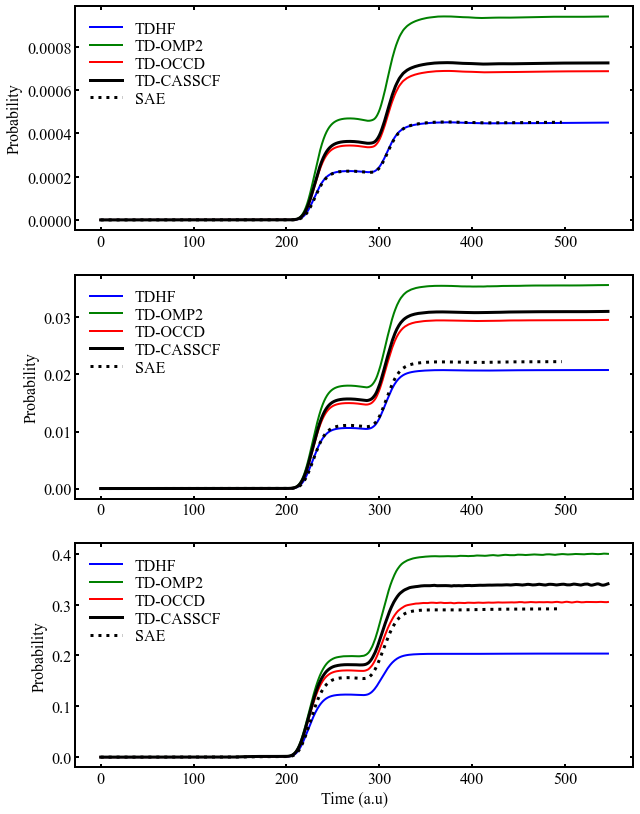

In [108]:
fig = plt.figure(figsize=(10,14))
plt.rcParams['font.size'] = 16

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax4 = fig.add_subplot(313)

ax1.plot(time_abi, p1_hf, linewidth = 2.0, label="TDHF",color="blue")
ax1.plot(time_abi, p1_mp2, linewidth = 2.0, label="TD-OMP2",color="green")
ax1.plot(time_abi, p1_ccd, linewidth = 2.0, label="TD-OCCD", color="red")
ax1.plot(time_abi, p1_cas, linewidth = 3.0, label="TD-CASSCF", color="black")
ax1.plot(tion_sae, p1_sae, linewidth = 3.0, label="SAE",linestyle="dotted",color="black")
ax1.legend(labelspacing=0.1,frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax1.set_xlabel("Time (a.u)")
ax1.set_ylabel(r"Probability")

ax2.plot(time_abi, p2_hf, linewidth = 2.0, label="TDHF",color="blue")
ax2.plot(time_abi, p2_mp2, linewidth = 2.0, label="TD-OMP2",color="green")
ax2.plot(time_abi, p2_ccd, linewidth = 2.0, label="TD-OCCD", color="red")
ax2.plot(time_abi, p2_cas, linewidth = 3.0, label="TD-CASSCF", color="black")
ax2.plot(tion_sae, p2_sae, linewidth = 3.0, label="SAE",linestyle="dotted",color="black")
ax2.legend(labelspacing=0.1,frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax2.set_xlabel("Time (a.u)")
ax2.set_ylabel(r"Probability")

ax4.plot(time_abi, p4_hf, linewidth = 2.0, label="TDHF",color="blue")
ax4.plot(time_abi, p4_mp2, linewidth = 2.0, label="TD-OMP2",color="green")
ax4.plot(time_abi, p4_ccd, linewidth = 2.0, label="TD-OCCD", color="red")
ax4.plot(time_abi, p4_cas, linewidth = 3.0, label="TD-CASSCF", color="black")
ax4.plot(tion_sae, p4_sae, linewidth = 3.0, label="SAE",linestyle="dotted",color="black")
ax4.legend(labelspacing=0.1,frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
ax4.set_xlabel("Time (a.u)")
ax4.set_ylabel(r"Probability")

#plt.savefig("Ar_P1.pdf", bbox_inches = "tight")
plt.show()

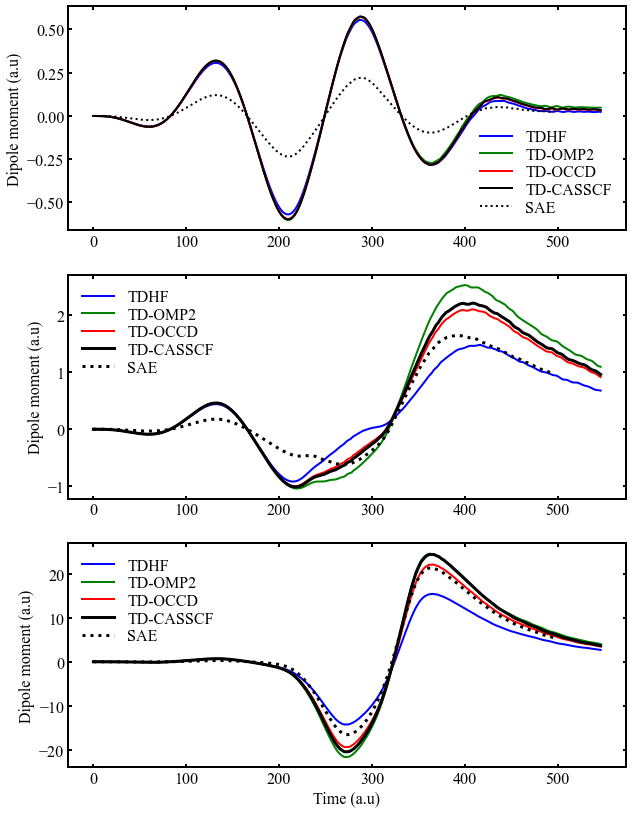

In [107]:
fig = plt.figure(figsize=(10,14))
plt.rcParams['font.size'] = 16

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax4 = fig.add_subplot(313)

ax1.plot(time_abi, d1_hf, linewidth = 2.0, label="TDHF",color="blue")
ax1.plot(time_abi, d1_mp2, linewidth = 2.0, label="TD-OMP2",color="green")
ax1.plot(time_abi, d1_ccd, linewidth = 2.0, label="TD-OCCD", color="red")
ax1.plot(time_abi, d1_cas, linewidth = 2.0, label="TD-CASSCF", color="black")
ax1.plot(tdip_sae, d1_sae, linewidth = 2.0, label="SAE",linestyle="dotted",color="black")
ax1.legend(labelspacing=0.1, loc='lower right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax1.set_xlabel("Time (a.u)")
ax1.set_ylabel(r"Dipole moment (a.u)")

ax2.plot(time_abi, d2_hf, linewidth = 2.0, label="TDHF",color="blue")
ax2.plot(time_abi, d2_mp2, linewidth = 2.0, label="TD-OMP2",color="green")
ax2.plot(time_abi, d2_ccd, linewidth = 2.0, label="TD-OCCD", color="red")
ax2.plot(time_abi, d2_cas, linewidth = 3.0, label="TD-CASSCF", color="black")
ax2.plot(tdip_sae, d2_sae, linewidth = 3.0, label="SAE",linestyle="dotted",color="black")
ax2.legend(labelspacing=0.1,frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax2.set_xlabel("Time (a.u)")
ax2.set_ylabel(r"Dipole moment (a.u)")

ax4.plot(time_abi, d4_hf, linewidth = 2.0, label="TDHF",color="blue")
ax4.plot(time_abi, d4_mp2, linewidth = 2.0, label="TD-OMP2",color="green")
ax4.plot(time_abi, d4_ccd, linewidth = 2.0, label="TD-OCCD", color="red")
ax4.plot(time_abi, d4_cas, linewidth = 3.0, label="TD-CASSCF", color="black")
ax4.plot(tdip_sae, d4_sae, linewidth = 3.0, label="SAE",linestyle="dotted",color="black")
ax4.legend(labelspacing=0.1,frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
ax4.set_xlabel("Time (a.u)")
ax4.set_ylabel(r"Dipole moment (a.u)")

#plt.savefig("Ar_Dip.pdf", bbox_inches = "tight")
plt.show()

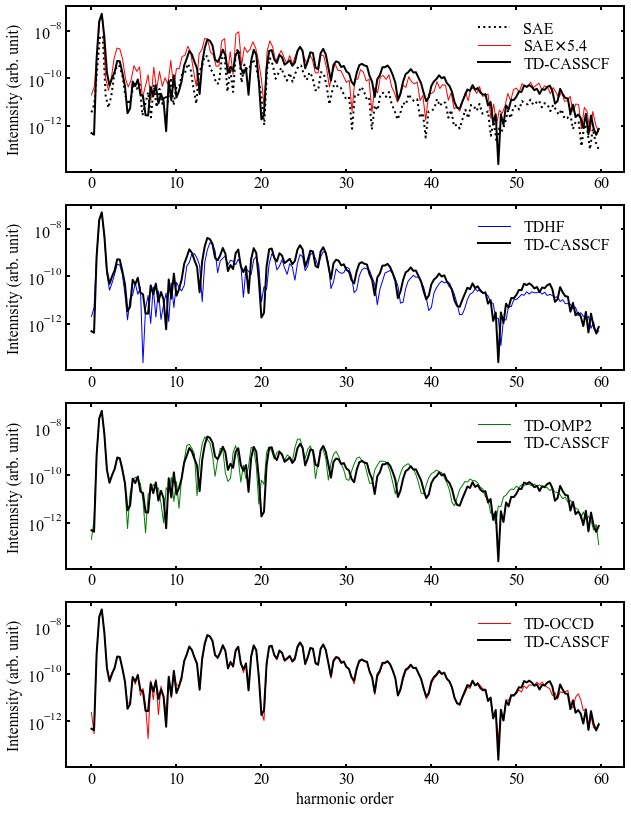

In [115]:
fig = plt.figure(figsize=(10,14))
plt.rcParams['font.size'] = 16

ax_sae = fig.add_subplot(411)
ax_hf = fig.add_subplot(412)
ax_mp2 = fig.add_subplot(413)
ax_ccd = fig.add_subplot(414)

ax_sae.plot(order1_sae[0:imax1_sae], aspec1_sae[0:imax1_sae], linewidth = 2.0, label="SAE",color="black",linestyle="dotted")
ax_sae.plot(order1_sae[0:imax1_sae], 5.4*aspec1_sae[0:imax1_sae], linewidth = 1.0, color="red",label=r"SAE$\times$5.4")
ax_sae.plot(order1_abi[0:imax1_abi], aspec1_cas[0:imax1_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_sae.legend(labelspacing=0.1, loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_sae.set_xlabel("harmonic order")
ax_sae.set_ylabel(r"Intennsity (arb. unit)")
ax_sae.set_yscale("log")

ax_hf.plot(order1_abi[0:imax1_abi], aspec1_hf[0:imax1_abi], linewidth = 1.0, label="TDHF",color="blue")
ax_hf.plot(order1_abi[0:imax1_abi], aspec1_cas[0:imax1_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_hf.legend(labelspacing=0.1, loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_hf.set_xlabel("harmonic order")
ax_hf.set_ylabel(r"Intennsity (arb. unit)")
ax_hf.set_yscale("log")

ax_mp2.plot(order1_abi[0:imax1_abi], aspec1_mp2[0:imax1_abi], linewidth = 1.0, label="TD-OMP2",color="green")
ax_mp2.plot(order1_abi[0:imax1_abi], aspec1_cas[0:imax1_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_mp2.legend(labelspacing=0.1, loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_mp2.set_xlabel("harmonic order")
ax_mp2.set_ylabel(r"Intennsity (arb. unit)")
ax_mp2.set_yscale("log")

ax_ccd.plot(order1_abi[0:imax1_abi], aspec1_ccd[0:imax1_abi], linewidth = 1.0, label="TD-OCCD",color="red")
ax_ccd.plot(order1_abi[0:imax1_abi], aspec1_cas[0:imax1_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_ccd.legend(labelspacing=0.1, loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
ax_ccd.set_xlabel("harmonic order")
ax_ccd.set_ylabel(r"Intennsity (arb. unit)")
ax_ccd.set_yscale("log")

#plt.savefig("Ar_HHG1.pdf", bbox_inches = "tight")
plt.show()

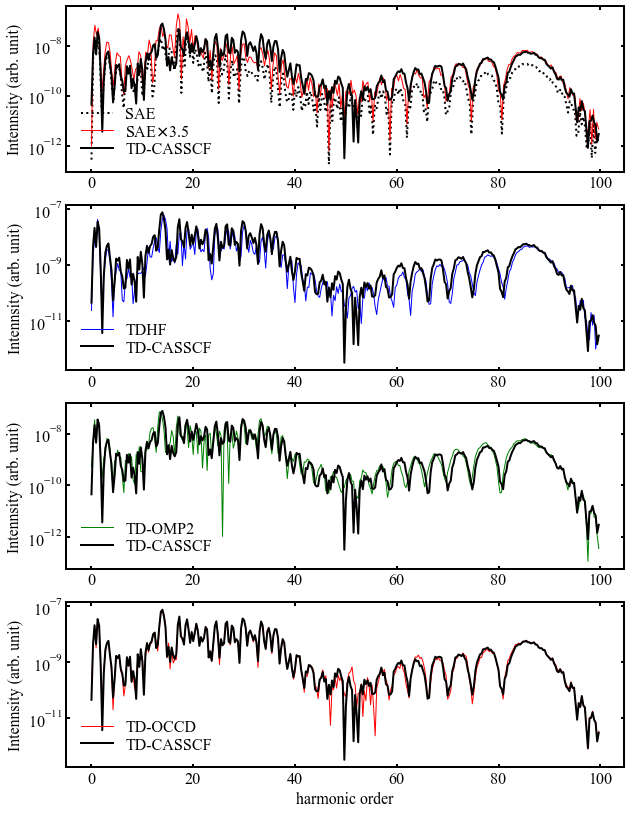

In [112]:
fig = plt.figure(figsize=(10,14))
plt.rcParams['font.size'] = 16

ax_sae = fig.add_subplot(411)
ax_hf = fig.add_subplot(412)
ax_mp2 = fig.add_subplot(413)
ax_ccd = fig.add_subplot(414)

ax_sae.plot(order2_sae[0:imax2_sae], aspec2_sae[0:imax2_sae], linewidth = 2.0, label="SAE",color="black",linestyle="dotted")
ax_sae.plot(order2_sae[0:imax2_sae], 3.5*aspec2_sae[0:imax2_sae], linewidth = 1.0, color="red",label=r"SAE$\times$3.5")
ax_sae.plot(order2_abi[0:imax2_abi], aspec2_cas[0:imax2_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_sae.legend(labelspacing=0.1, loc='lower left',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_sae.set_xlabel("harmonic order")
ax_sae.set_ylabel(r"Intennsity (arb. unit)")
ax_sae.set_yscale("log")

ax_hf.plot(order2_abi[0:imax2_abi], aspec2_hf[0:imax2_abi], linewidth = 1.0, label="TDHF",color="blue")
ax_hf.plot(order2_abi[0:imax2_abi], aspec2_cas[0:imax2_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_hf.legend(labelspacing=0.1, loc='lower left',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_hf.set_xlabel("harmonic order")
ax_hf.set_ylabel(r"Intennsity (arb. unit)")
ax_hf.set_yscale("log")

ax_mp2.plot(order2_abi[0:imax2_abi], aspec2_mp2[0:imax2_abi], linewidth = 1.0, label="TD-OMP2",color="green")
#ax_mp2.plot(order2_abi[0:imax2_abi], aspec2_ccd[0:imax2_abi], linewidth = 1.0, label="TD-OCCD",color="red")
ax_mp2.plot(order2_abi[0:imax2_abi], aspec2_cas[0:imax2_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_mp2.legend(labelspacing=0.1, loc='lower left',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_mp2.set_xlabel("harmonic order")
ax_mp2.set_ylabel(r"Intennsity (arb. unit)")
ax_mp2.set_yscale("log")

ax_ccd.plot(order2_abi[0:imax2_abi], aspec2_ccd[0:imax2_abi], linewidth = 1.0, label="TD-OCCD",color="red")
ax_ccd.plot(order2_abi[0:imax2_abi], aspec2_cas[0:imax2_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_ccd.legend(labelspacing=0.1, loc='lower left',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
ax_ccd.set_xlabel("harmonic order")
ax_ccd.set_ylabel(r"Intennsity (arb. unit)")
ax_ccd.set_yscale("log")

#plt.savefig("Ar_HHG2.pdf", bbox_inches = "tight")
plt.show()

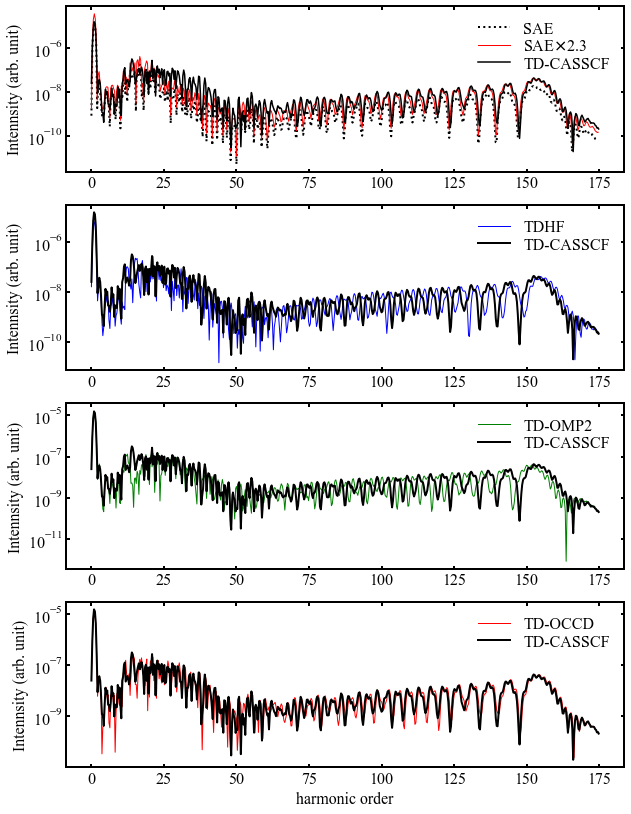

In [104]:
fig = plt.figure(figsize=(10,14))
plt.rcParams['font.size'] = 16

ax_sae = fig.add_subplot(411)
ax_hf = fig.add_subplot(412)
ax_mp2 = fig.add_subplot(413)
ax_ccd = fig.add_subplot(414)

ax_sae.plot(order4_sae[0:imax4_sae], aspec4_sae[0:imax4_sae], linewidth = 2.0, label="SAE",color="black",linestyle="dotted")
ax_sae.plot(order4_sae[0:imax4_sae], 2.3*aspec4_sae[0:imax4_sae], linewidth = 1.0, color="red",label=r"SAE$\times$2.3")
ax_sae.plot(order4_abi[0:imax4_abi], aspec4_cas[0:imax4_abi], linewidth = 1.5, label="TD-CASSCF",color="black")
ax_sae.legend(labelspacing=0.1, loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_sae.set_xlabel("harmonic order")
ax_sae.set_ylabel(r"Intennsity (arb. unit)")
ax_sae.set_yscale("log")

ax_hf.plot(order4_abi[0:imax4_abi], aspec4_hf[0:imax4_abi], linewidth = 1.0, label="TDHF",color="blue")
ax_hf.plot(order4_abi[0:imax4_abi], aspec4_cas[0:imax4_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_hf.legend(labelspacing=0.1, loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_hf.set_xlabel("harmonic order")
ax_hf.set_ylabel(r"Intennsity (arb. unit)")
ax_hf.set_yscale("log")

ax_mp2.plot(order4_abi[0:imax4_abi], aspec4_mp2[0:imax4_abi], linewidth = 1.0, label="TD-OMP2",color="green")
ax_mp2.plot(order4_abi[0:imax4_abi], aspec4_cas[0:imax4_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_mp2.legend(labelspacing=0.1, loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax_mp2.set_xlabel("harmonic order")
ax_mp2.set_ylabel(r"Intennsity (arb. unit)")
ax_mp2.set_yscale("log")

ax_ccd.plot(order4_abi[0:imax4_abi], aspec4_ccd[0:imax4_abi], linewidth = 1.0, label="TD-OCCD",color="red")
ax_ccd.plot(order4_abi[0:imax4_abi], aspec4_cas[0:imax4_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax_ccd.legend(labelspacing=0.1, loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
ax_ccd.set_xlabel("harmonic order")
ax_ccd.set_ylabel(r"Intennsity (arb. unit)")
ax_ccd.set_yscale("log")

plt.savefig("Ar_HHG4.pdf", bbox_inches = "tight")
plt.show()

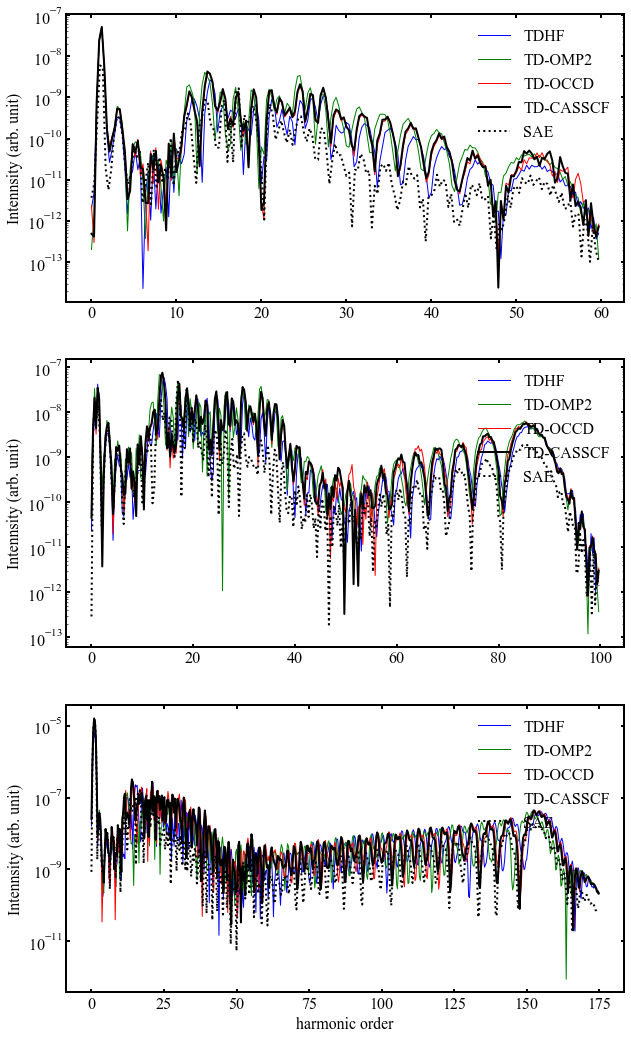

In [63]:
fig = plt.figure(figsize=(10,18))
plt.rcParams['font.size'] = 16

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax4 = fig.add_subplot(313)

ax1.plot(order1_abi[0:imax1_abi], aspec1_hf[0:imax1_abi], linewidth = 1.0, label="TDHF",color="blue")
ax1.plot(order1_abi[0:imax1_abi], aspec1_mp2[0:imax1_abi], linewidth = 1.0, label="TD-OMP2",color="green")
ax1.plot(order1_abi[0:imax1_abi], aspec1_ccd[0:imax1_abi], linewidth = 1.0, label="TD-OCCD",color="red")
ax1.plot(order1_abi[0:imax1_abi], aspec1_cas[0:imax1_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax1.plot(order1_sae[0:imax1_sae], aspec1_sae[0:imax1_sae], linewidth = 2.0, label="SAE",color="black",linestyle="dotted")
ax1.legend( loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax1.set_xlabel("harmonic order")
ax1.set_ylabel(r"Intennsity (arb. unit)")
ax1.set_yscale("log")

ax2.plot(order2_abi[0:imax2_abi], aspec2_hf[0:imax2_abi], linewidth = 1.0, label="TDHF",color="blue")
ax2.plot(order2_abi[0:imax2_abi], aspec2_mp2[0:imax2_abi], linewidth = 1.0, label="TD-OMP2",color="green")
ax2.plot(order2_abi[0:imax2_abi], aspec2_ccd[0:imax2_abi], linewidth = 1.0, label="TD-OCCD",color="red")
ax2.plot(order2_abi[0:imax2_abi], aspec2_cas[0:imax2_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax2.plot(order2_sae[0:imax2_sae], aspec2_sae[0:imax2_sae], linewidth = 2.0, label="SAE",color="black",linestyle="dotted")
ax2.legend( loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
#ax2.set_xlabel("harmonic order")
ax2.set_ylabel(r"Intennsity (arb. unit)")
ax2.set_yscale("log")

ax4.plot(order4_abi[0:imax4_abi], aspec4_hf[0:imax4_abi], linewidth = 1.0, label="TDHF",color="blue")
ax4.plot(order4_abi[0:imax4_abi], aspec4_mp2[0:imax4_abi], linewidth = 1.0, label="TD-OMP2",color="green")
ax4.plot(order4_abi[0:imax4_abi], aspec4_ccd[0:imax4_abi], linewidth = 1.0, label="TD-OCCD",color="red")
ax4.plot(order4_abi[0:imax4_abi], aspec4_cas[0:imax4_abi], linewidth = 2.0, label="TD-CASSCF",color="black")
ax4.plot(order4_sae[0:imax4_sae], aspec4_sae[0:imax4_sae], linewidth = 2.0, label="SAE",color="black",linestyle="dotted")
ax4.legend( loc='upper right',fontsize=16, frameon=False)#bbox_to_anchor=(0.5,-0.3), loc='upper center')
ax4.set_xlabel("harmonic order")
ax4.set_ylabel(r"Intennsity (arb. unit)")
ax4.set_yscale("log")

#plt.savefig("Ar_HHG.pdf", bbox_inches = "tight")
plt.show()